# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load Dataset & Train / Test Split

In [2]:
dataset = pd.read_csv("../data/Social_Network_Ads.csv")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Feature Scaling (CRITICAL)

In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper Functions

## Decision Boundary

In [4]:
def plot_decision_boundary(X, y, model, scaler, title):
    # 1. Create a mesh grid in the SCALED space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Using a consistent step size for scaled data
    X1, X2 = np.meshgrid(
        np.arange(x_min, x_max, step=0.02),
        np.arange(y_min, y_max, step=0.02)
    )

    # 2. Predict using the scaled grid
    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # 3. Plotting
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("red", "green")))

    # 4. Plot the data points (still in scaled space for alignment)
    for i, label in enumerate(np.unique(y)):
        plt.scatter(
            X[y == label, 0],
            X[y == label, 1],
            color=ListedColormap(("red", "green"))(i),
            label=label,
            edgecolors='black'
        )

    plt.title(title)
    plt.xlabel("Age (Scaled)")
    plt.ylabel("Salary (Scaled)")
    plt.legend()
    plt.show()

## Train + Evaluate

In [5]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return acc, cm, y_pred

## Confusion Matrix Plot

In [6]:
def plot_confusion_matrix(cm, title):
    plt.imshow(cm)
    plt.title(title)
    plt.colorbar()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

# Define Models

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train & Evaluate ALL models

Logistic Regression Accuracy: 0.860


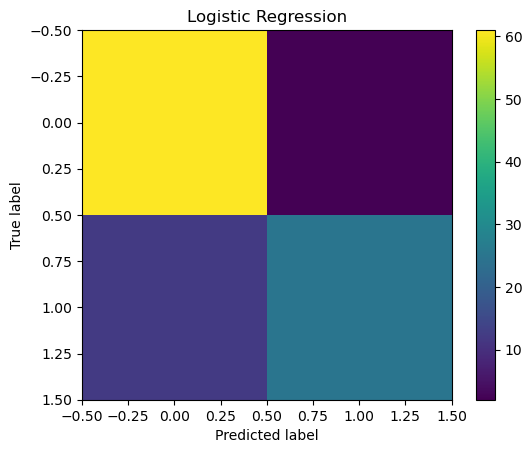

KNN Accuracy: 0.930


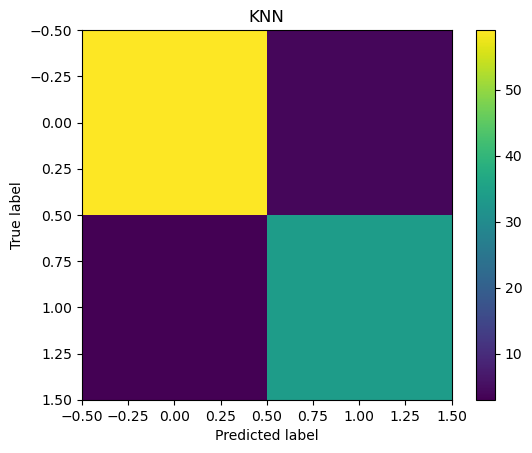

SVM (Linear) Accuracy: 0.860


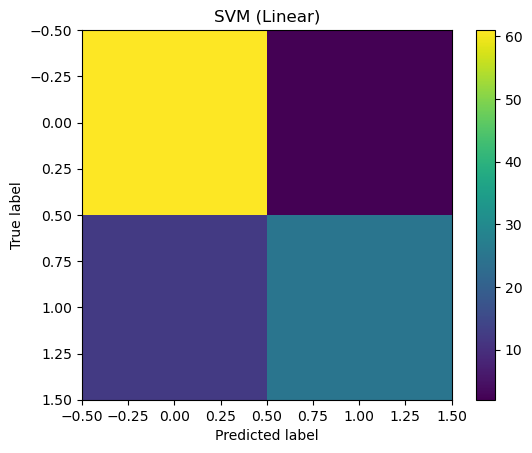

SVM (RBF) Accuracy: 0.930


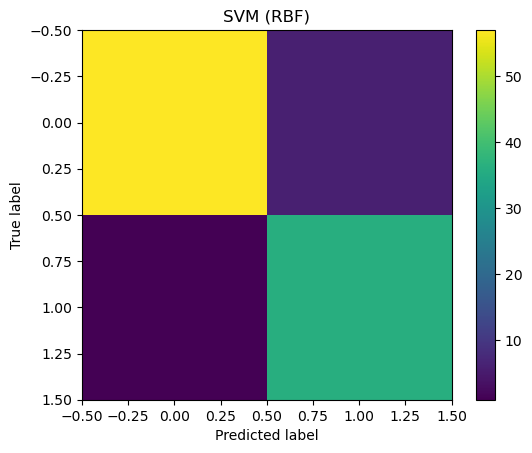

Naive Bayes Accuracy: 0.930


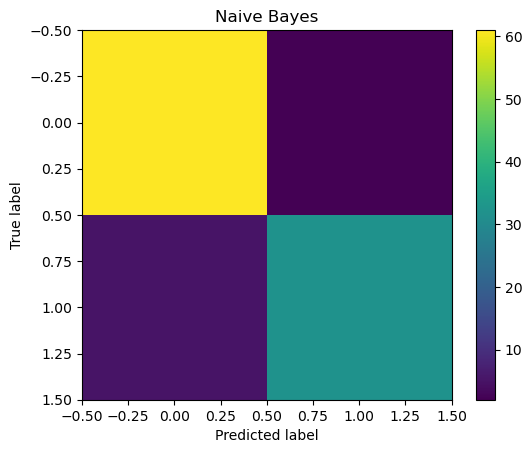

Decision Tree Accuracy: 0.830


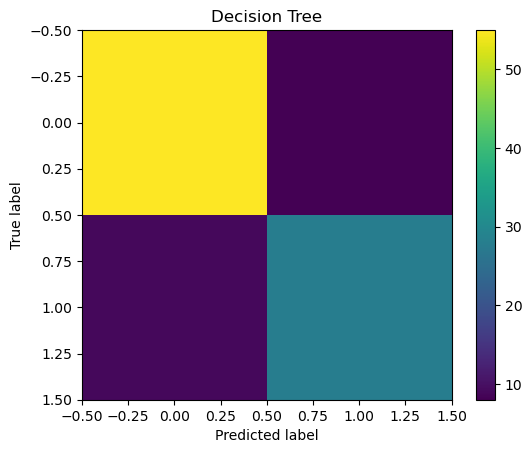

Random Forest Accuracy: 0.890


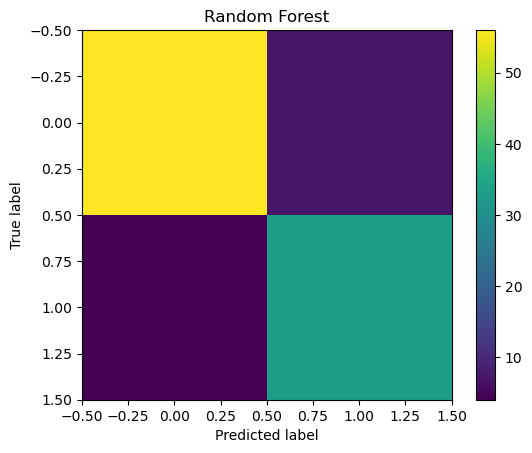

In [8]:
results = {}
trained_models = {}

for name, model in models.items():
    acc, cm, y_pred = train_and_evaluate(
        model,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test
    )

    results[name] = acc
    trained_models[name] = model

    print(f"{name} Accuracy: {acc:.3f}")
    plot_confusion_matrix(cm, name)

# Decision Boundary Visualizations

Visualizing Logistic Regression...


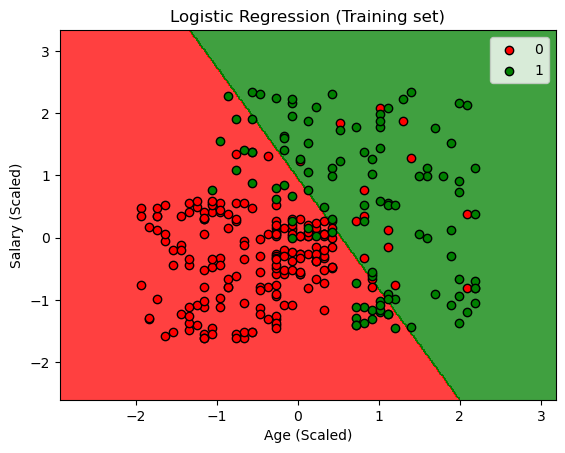

Visualizing KNN...


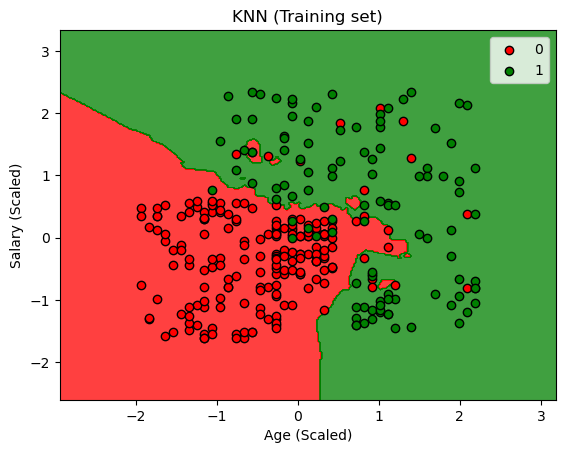

Visualizing SVM (Linear)...


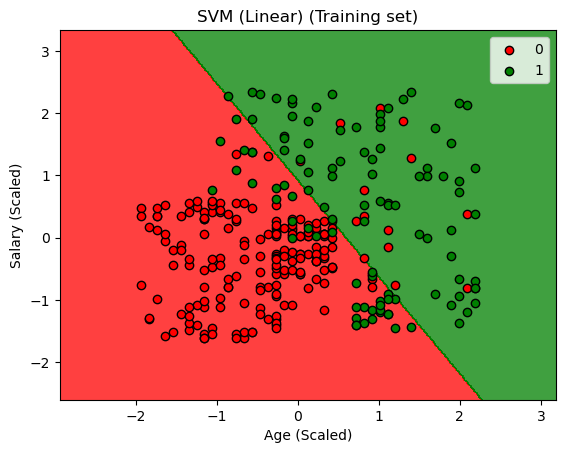

Visualizing SVM (RBF)...


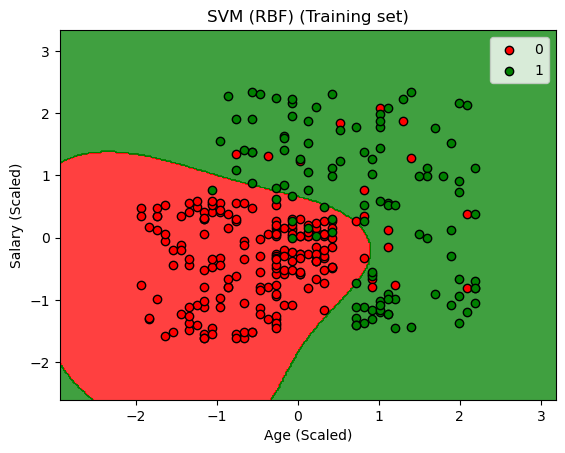

Visualizing Naive Bayes...


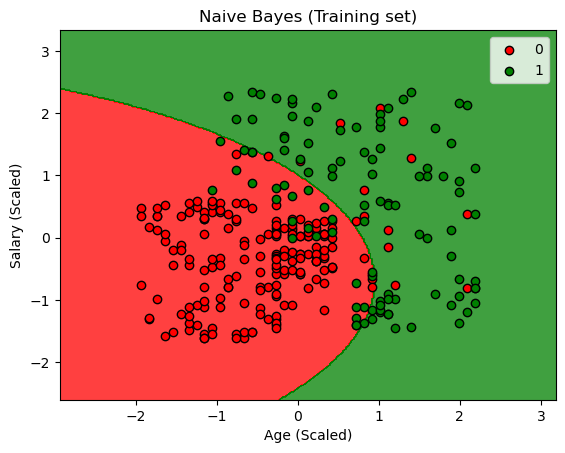

Visualizing Decision Tree...


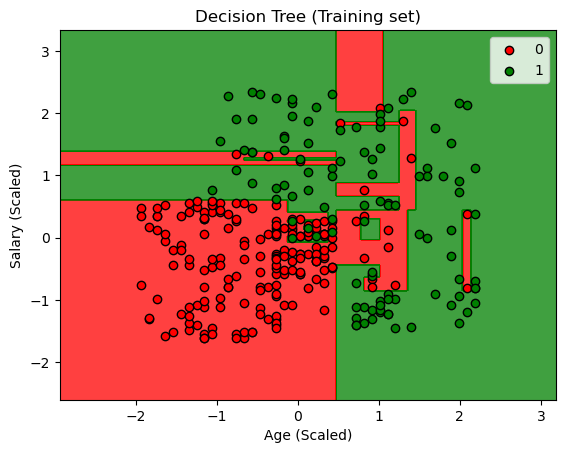

Visualizing Random Forest...


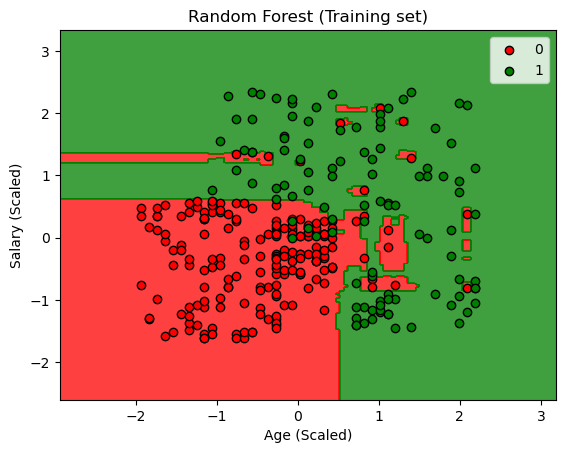

In [9]:
# # Decision Boundary Visualizations
for name, model in trained_models.items():
    print(f"Visualizing {name}...")
    # Call the actual function you wrote!
    plot_decision_boundary(X_train_scaled, y_train, model, scaler, f"{name} (Training set)")


# Results Summary

In [10]:
results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["Accuracy"]
).sort_values(by="Accuracy", ascending=False)

results_df


,Accuracy
KNN,0.93
Naive Bayes,0.93
SVM (RBF),0.93
Random Forest,0.89
Logistic Regression,0.86
SVM (Linear),0.86
Decision Tree,0.83
